In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
def accuracy(x,y):
    acc = 0
    for i in range(len(x)):
        if x[i,]==y[i,]:
            acc+=1
        else:
            acc+=0
    rate = acc/len(x)
    print('Accuracy rate is: ',rate)
    
    
def plot(image,ans):
    if len(image) > 10 | len(ans) > 10:
        print('TOO MANY PHOTOS IN ONE TIME!!')
        print('The maximum is 10 photos')
    for i in range(len(image)):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i,...])
        plt.title(ans[i])

In [3]:
path=os.getcwd()+'\\DATA\\picture02'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)            

Images are all in read_images
(40000, 100, 100)


In [4]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


# picture2 80-第一次

In [5]:
# model_p2_80_1

def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_p2_80_1
#     global model
    model_p2_80_1 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_p2_80_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath="C:\\Users\\user\\Desktop\\project\\VGG16_picture2\\checkpoint80_record\\model_iter80_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_80_1 = model_p2_80_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=80, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_3要修改 30是epoch ,3是第3次

#########################################################################

#把訓練結果(train_history_30_3)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_3 要改,30是epoch ,3是第3次

# file='train_history的資料夾\train_history_30_3.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_picture2\train_history_80\train_history_80_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_80_1.history, outhis)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 22400 samples, validate on 9600 samples
Epoch 1/80

Epoch 00001: acc improved from -inf to 0.32464, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_1.hdf5
22400/22400 - 92s - loss: 1.9039 - acc: 0.3246 - val_loss: 1.7392 - val_acc: 0.3243
Epoch 2/80

Epoch 00002: acc improved from 0.32464 to 0.44040, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_1.hdf5
22400/22400 - 87s - loss: 1.3755 - acc: 0.4404 - val_loss: 1.8198 - val_acc: 0.3350
Epoch 3/80

Epoch 00003: acc improved from 0.44040 to 0.55076, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_1.hdf5
22400/22400 - 87s - loss: 1.0593 - acc: 0.5508 - val_loss: 4.0691 - val_acc: 0.4282
Epoch 4/80

Epoch 00004: acc improved from 0.55076 to 0.59786, saving model to C:\Users\user

22400/22400 - 87s - loss: 0.2384 - acc: 0.8748 - val_loss: 0.6544 - val_acc: 0.7682
Epoch 35/80

Epoch 00035: acc improved from 0.87482 to 0.87964, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_1.hdf5
22400/22400 - 87s - loss: 0.2262 - acc: 0.8796 - val_loss: 0.3562 - val_acc: 0.8390
Epoch 36/80

Epoch 00036: acc improved from 0.87964 to 0.89210, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_1.hdf5
22400/22400 - 87s - loss: 0.2038 - acc: 0.8921 - val_loss: 0.3597 - val_acc: 0.8271
Epoch 37/80

Epoch 00037: acc did not improve from 0.89210
22400/22400 - 86s - loss: 0.3760 - acc: 0.8429 - val_loss: 0.5359 - val_acc: 0.7660
Epoch 38/80

Epoch 00038: acc did not improve from 0.89210
22400/22400 - 86s - loss: 0.2768 - acc: 0.8592 - val_loss: 0.4918 - val_acc: 0.7756
Epoch 39/80

Epoch 00039: acc did not improve from 0.89210
22400/22400 - 86s - loss: 0.2323 - acc: 0.8801 - val_loss: 0.3774 - val_a

22400/22400 - 87s - loss: 0.0353 - acc: 0.9894 - val_loss: 1.1078 - val_acc: 0.8299
Epoch 79/80

Epoch 00079: acc did not improve from 0.98942
22400/22400 - 86s - loss: 0.0431 - acc: 0.9857 - val_loss: 1.0401 - val_acc: 0.8130
Epoch 80/80

Epoch 00080: acc did not improve from 0.98942
22400/22400 - 87s - loss: 0.0743 - acc: 0.9743 - val_loss: 0.7460 - val_acc: 0.8283


# picture2 80- 第2次

In [6]:
# model_p2_80_2

def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_p2_80_2
#     global model
    model_p2_80_2 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(8,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_p2_80_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath="C:\\Users\\user\\Desktop\\project\\VGG16_picture2\\checkpoint80_record\\model_iter80_2.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_80_2 = model_p2_80_2.fit(x=x_train, y=y_train, validation_split=0.3, epochs=80, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_3要修改 30是epoch ,3是第3次

#########################################################################

#把訓練結果(train_history_30_3)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_3 要改,30是epoch ,3是第3次

# file='train_history的資料夾\train_history_30_3.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_picture2\train_history_80\train_history_80_2.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_80_2.history, outhis)

Train on 22400 samples, validate on 9600 samples
Epoch 1/80

Epoch 00001: acc improved from -inf to 0.31232, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 89s - loss: 2.0161 - acc: 0.3123 - val_loss: 2.3626 - val_acc: 0.1698
Epoch 2/80

Epoch 00002: acc improved from 0.31232 to 0.46536, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 1.3135 - acc: 0.4654 - val_loss: 2.5222 - val_acc: 0.3304
Epoch 3/80

Epoch 00003: acc improved from 0.46536 to 0.55045, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 1.0772 - acc: 0.5504 - val_loss: 1.5325 - val_acc: 0.4524
Epoch 4/80

Epoch 00004: acc improved from 0.55045 to 0.60045, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 0.9376 - acc: 0.6004

Epoch 36/80

Epoch 00036: acc improved from 0.89777 to 0.90406, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 0.1904 - acc: 0.9041 - val_loss: 0.4159 - val_acc: 0.8316
Epoch 37/80

Epoch 00037: acc improved from 0.90406 to 0.90781, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 0.1939 - acc: 0.9078 - val_loss: 0.4351 - val_acc: 0.8201
Epoch 38/80

Epoch 00038: acc improved from 0.90781 to 0.91210, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 0.1956 - acc: 0.9121 - val_loss: 0.3663 - val_acc: 0.8386
Epoch 39/80

Epoch 00039: acc improved from 0.91210 to 0.92388, saving model to C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\model_iter80_2.hdf5
22400/22400 - 87s - loss: 0.1721 - acc: 0.9239 - val_loss: 0.9552 - val_acc: 0.7825
Epoc

Epoch 80/80

Epoch 00080: acc did not improve from 0.99522
22400/22400 - 86s - loss: 0.0178 - acc: 0.9946 - val_loss: 0.9501 - val_acc: 0.8334


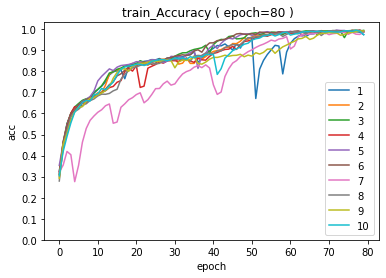

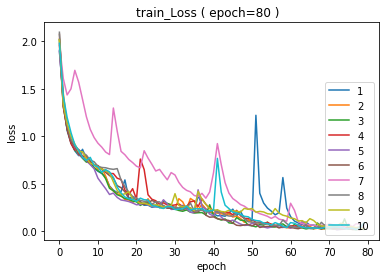

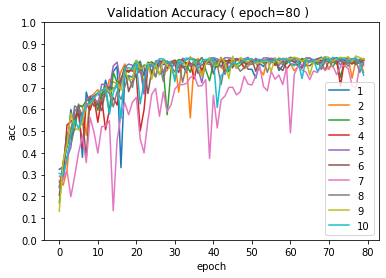

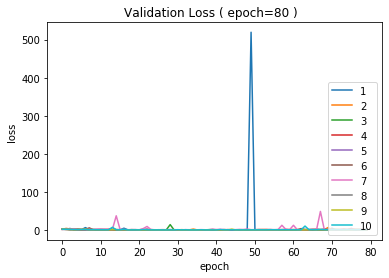

In [6]:
# 80

dirpath=r'C:\Users\user\Desktop\project\VGG16_picture2\train_history_80\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename
########## train acc  80


for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['acc'],label=i+1)
        
    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('train_Accuracy ( epoch=80 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\train_acc_80.jpg')    #匯出到資料夾 
plt.show()

############## train loss  80



for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['loss'],label=i+1)
        
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('train_Loss ( epoch=80 )  ') #epoch要改
    plt.legend(loc=4)    
plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\train_loss_80.jpg')     
plt.show()


################ val acc  80


for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_acc'],label=i+1)

    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('Validation Accuracy ( epoch=80 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\val_acc_80.jpg') 
plt.show()

############# val loss 80

for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_loss'],label=i+1)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Validation Loss ( epoch=80 )  ') #epoch要改
    plt.legend(loc=4)
   
    
plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\val_loss_80.jpg') 
plt.show()

In [7]:
# 80
# 紀錄10次train/val的 acc/loss 最高/低 平均
#這裡都不用改喔

train_acc_max_10=[]
train_loss_min_10=[]
val_acc_max_10=[]
val_loss_min_10=[]

for i in range(0,2):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
        train_acc_max_10.append(max(a['acc']))
        train_loss_min_10.append(min(a['loss'])) 
        val_acc_max_10.append(max(a['val_acc']))
        val_loss_min_10.append(min(a['val_loss']))                                         
        
        

print("10次train_acc最高的平均={}".format(round(sum(train_acc_max_10)/len(train_acc_max_10),3)))    
print("10次train_loss最低的平均={}".format(round(sum(train_loss_min_10)/len(train_loss_min_10),3)))
print("10次val_acc最高的平均={}".format(round(sum(val_acc_max_10)/len(val_acc_max_10),3)))    
print("10次val_loss最低的平均={}".format(round(sum(val_loss_min_10)/len(val_loss_min_10),3)))



10次train_acc最高的平均=0.991
10次train_loss最低的平均=0.026
10次val_acc最高的平均=0.838
10次val_loss最低的平均=0.328


In [8]:
# 80 
# 自動增長 GPU 記憶體用量
#gpu_options = tf.GPUOptions(allow_growth=True)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# 10 次 test的 acc和 loss的平均(記錄到雲端表格中)
#這裡只要改路徑，其他的不用改

dirpath1=r'C:\Users\user\Desktop\project\VGG16_picture2\checkpoint80_record\*.*' #checkpoint30_record資料夾
filename2=glob.glob(dirpath1)


test_acc=[]
test_loss=[]

for i in range(0,10):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
    test_acc.append(a[1])
    test_loss.append(a[0])

print("10次test_loss平均={}".format(round(sum(test_loss)/len(test_loss),3)))
print("10次test_acc平均={}".format(round(sum(test_acc)/len(test_acc),3) ))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 9s 1ms/sample - loss: 0.8888 - acc: 0.8403
10次test_loss平均=1.295
10次test_acc平均=0.814
